In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
from google.colab import files
uploaded = files.upload()

Saving abalone.csv to abalone.csv


**2. Load the dataset into the tool**

In [29]:
import pandas as pd
import io
import numpy as np

In [4]:
df = pd.read_csv(io.BytesIO(uploaded['abalone.csv']))

In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


3.**Perform Below Visualizations.
∙ Univariate Analysis
∙ Bi-Variate Analysis
∙ Multi-Variate Analysis**

**Univariate Analysis**

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import matplotlib.pyplot as plt


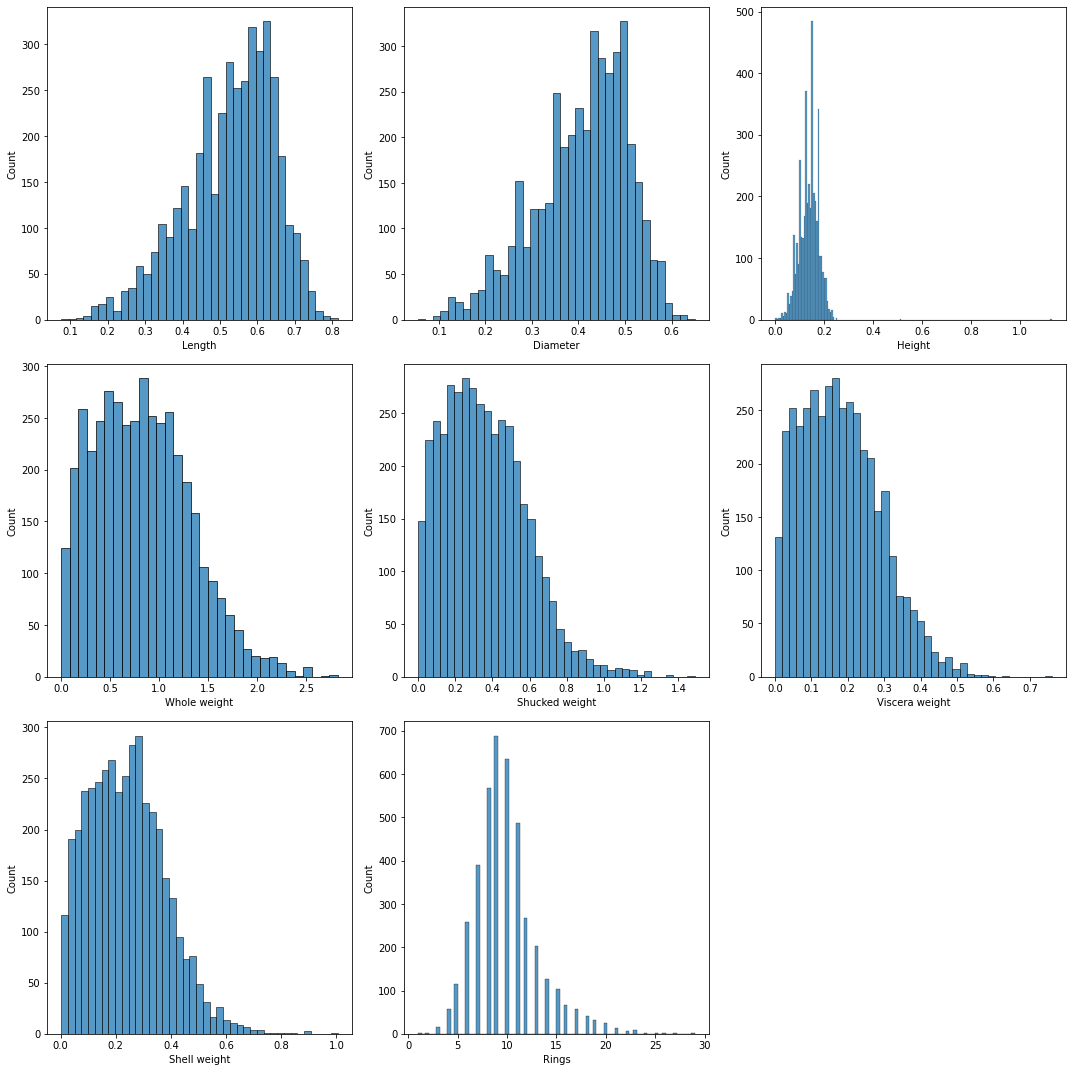

In [11]:
cols = 3
rows = 3
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = df[col], ax = ax)
    
fig.tight_layout()  
plt.show()

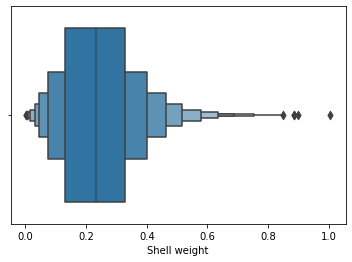

In [13]:
sns.boxenplot(x=df["Shell weight"])

**Bi-Variate Analysis**

Text(0, 0.5, 'Length')

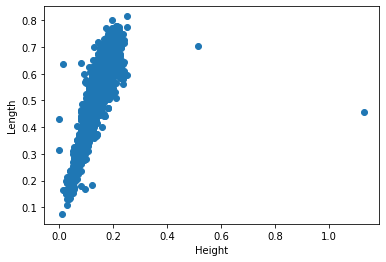

In [20]:
plt.scatter(df.Height,df.Length)
plt.xlabel('Height')
plt.ylabel('Length')

**Multi-Variate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


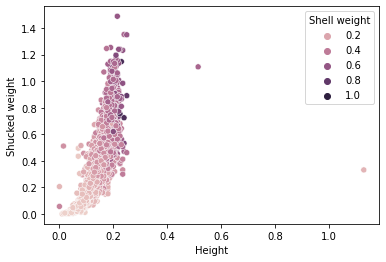

In [23]:
sns.scatterplot(df['Height'], df['Shucked weight'], hue = df['Shell weight'])


**4. Perform descriptive statistics on the dataset.**

In [24]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length            0.523992
Diameter          0.407881
Height            0.139516
Whole weight      0.828742
Shucked weight    0.359367
Viscera weight    0.180594
Shell weight      0.238831
Rings             9.933684
dtype: float64

In [25]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length            0.5450
Diameter          0.4250
Height            0.1400
Whole weight      0.7995
Shucked weight    0.3360
Viscera weight    0.1710
Shell weight      0.2340
Rings             9.0000
dtype: float64

In [26]:
df.mode()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.550,0.45,0.15,0.2225,0.175,0.1715,0.275,9.0
1,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN



**5. Check for Missing values and deal with them.**

In [27]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There is no missing values

6.**Find the outliers and replace them outliers**

In [30]:
df['Shell weight'] = np.where(df['Shell weight'] > 325, 140, df['Shell weight'])
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


7. **Check for Categorical columns and perform encoding.**

In [32]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(df)
categorical_columns

['Sex']

In [33]:
data_categorical = df[categorical_columns]
data_categorical.head()

,Sex
0,M
1,M
2,F
3,M
4,I


In [35]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Sex'].unique()

array([2, 0, 1])

8. **Split the data into dependent and independent variables.**

In [36]:
x=df.iloc[:,:-1]
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [37]:
y=df.iloc[:,-1]
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

. 9. **Scale the independent variables**

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [40]:

df_scaled =df.copy()
col_names = ['Shucked weight', 'Whole weight']
features = df_scaled[col_names]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled[col_names] = scaler.fit_transform(features.values)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 10))

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,5.906676,5.751513,0.1010,0.1500,15
1,2,0.350,0.265,0.090,5.395785,5.331204,0.0485,0.0700,7
2,0,0.530,0.420,0.135,6.195325,5.859112,0.1415,0.2100,9
3,2,0.440,0.365,0.125,5.910218,5.721251,0.1140,0.1550,10
4,1,0.330,0.255,0.080,5.359483,5.297579,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,6.567204,6.240753,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,6.707101,6.472764,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,7.078980,6.763618,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,6.934656,6.782112,0.2610,0.2960,10


10.**Split the data into training and testing**


In [42]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [43]:
x_train.shape

(2798, 8)

In [44]:
x_test.shape

(1379, 8)

11. **Build the Model**


In [45]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()

12. **Train the Model**

In [51]:
reg.fit(x_train,y_train)

RandomForestRegressor()

**13. Test the Model**

In [52]:
y_pred=reg.predict(x_test)


In [53]:
print(y_pred)

[ 9.28  7.07 10.19 ...  8.58 11.18  6.61]


**14. Measure the performance using Metrics.**

In [54]:
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(y_test,y_pred)))

2.179257695735751
